<a href="https://www.kaggle.com/code/sonawanelalitsunil/exploring-data-science-careers?scriptVersionId=205729911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job/data_science_job.csv


## Exploring Data Science Careers: An Analysis of Job Trends and Skills

#### Objective: The goal of this analysis is to explore the current landscape of data science careers by analyzing key trends, required skills, and market demand. By leveraging Kaggle datasets, we aim to uncover insights into the skills most in demand, the types of roles available, and how the data science job market is evolving over time

### Key Areas of Focus:

### Job Titles and Roles

##### Overview of common job titles in the data science field (e.g., Data Scientist, Data Analyst, Machine Learning Engineer, etc.)
The growth in demand for specific roles and specialties (e.g., AI/ML, Data Engineering, Business Intelligence)
Required Skills

##### Analysis of the most frequently mentioned skills in data science job descriptions, such as Python, R, SQL, machine learning algorithms, and cloud technologies.
The impact of emerging technologies like deep learning, natural language processing (NLP), and data visualization on required skills.
Job Market Trends

##### How the job market has evolved over the past few years, including changes in the demand for data science roles.
Regional job availability and salary trends, including insights into geographic demand (e.g., Silicon Valley vs. global job markets).
Educational Requirements and Certifications

##### A look at the common educational backgrounds 
(e.g., computer science, statistics, mathematics) and certifications (e.g., AWS, Google Cloud, Coursera courses) that are valued by employers.
Company Demand for Data Scientists

##### Insights into which industries 
(e.g., tech, healthcare, finance) are hiring the most data scientists.
Major companies leading the hiring trends and their requirements for data science candidates.

### Import Libraries 

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('/kaggle/input/data-science-job/data_science_job.csv')

In [4]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [5]:
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S
4999,2020,Data Scientist (Remote),Engineering,GBP,143565,172425,CN,EX,CT,Remote,CN,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [8]:
missing_value = df.isnull().sum()

In [9]:
print(missing_value)

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [10]:
print(missing_value[missing_value > 0])

job_category        500
salary_currency     500
experience_level    500
company_size        500
dtype: int64


In [11]:
df['salary_in_usd'].dropna().describe()

count      5000.000000
mean     114076.995800
std       49113.807687
min       30016.000000
25%       71343.750000
50%      114167.000000
75%      156665.750000
max      199985.000000
Name: salary_in_usd, dtype: float64

In [12]:
df['salary_in_usd'].dtype

dtype('int64')

In [13]:
df = df.dropna(subset=['salary_in_usd'])  # Dropping rows with NaN values in the 'salary_in_usd' column

In [14]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

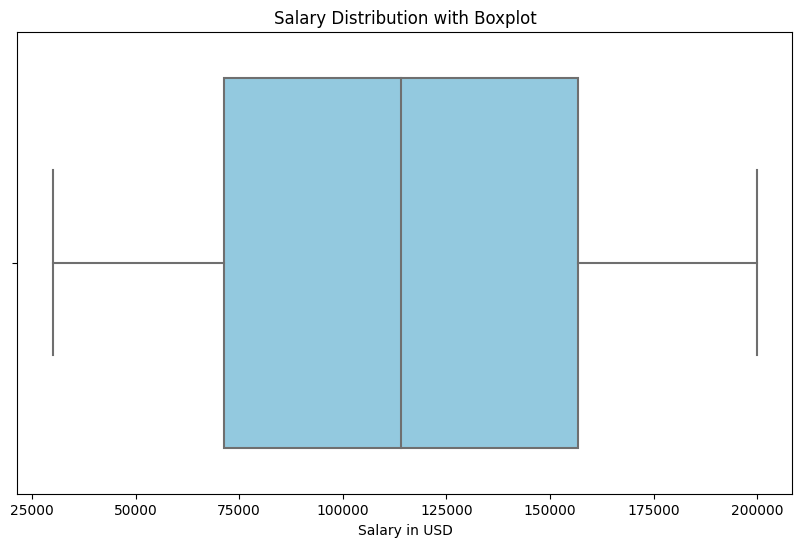

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'], color='skyblue')
plt.title('Salary Distribution with Boxplot')
plt.xlabel('Salary in USD')
plt.show()


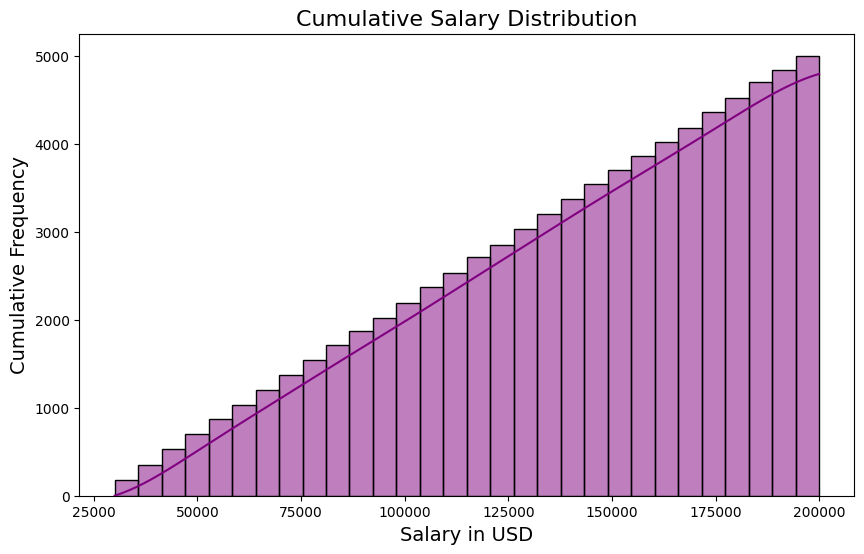

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, cumulative=True, color='purple')
plt.title('Cumulative Salary Distribution', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Cumulative Frequency', fontsize=14)
plt.show()

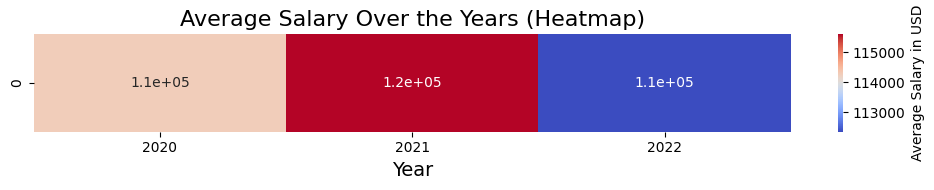

In [17]:
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Creating a 2D array to simulate a heatmap (even though it's a single column)
salary_matrix = avg_salary_by_year.values.reshape(1, -1)

plt.figure(figsize=(10, 2))
sns.heatmap(salary_matrix, annot=True, cmap='coolwarm', xticklabels=avg_salary_by_year.index, cbar_kws={'label': 'Average Salary in USD'})
plt.title('Average Salary Over the Years (Heatmap)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.show()


#### Top Locations for Data Science Jobs 

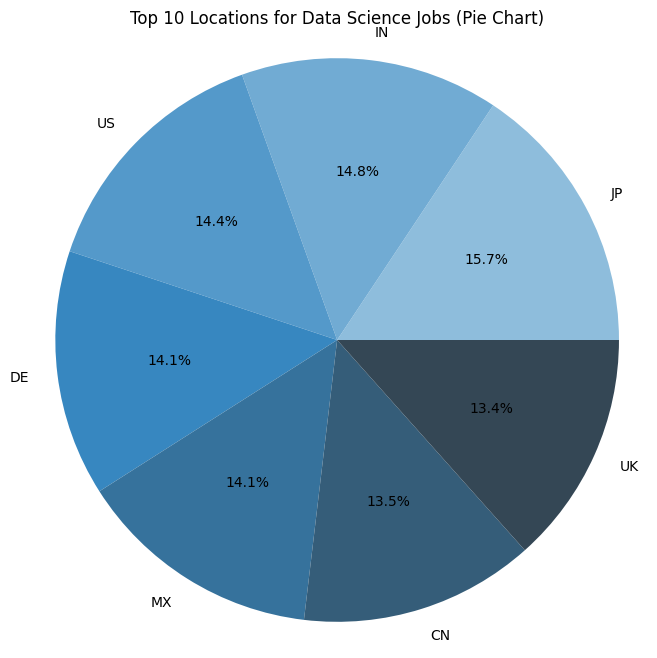

In [18]:
top_locations = df['employee_residence'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_locations.values, labels=top_locations.index, autopct='%1.1f%%', colors=sns.color_palette('Blues_d', len(top_locations)))
plt.title('Top 10 Locations for Data Science Jobs (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


### Salary by Location

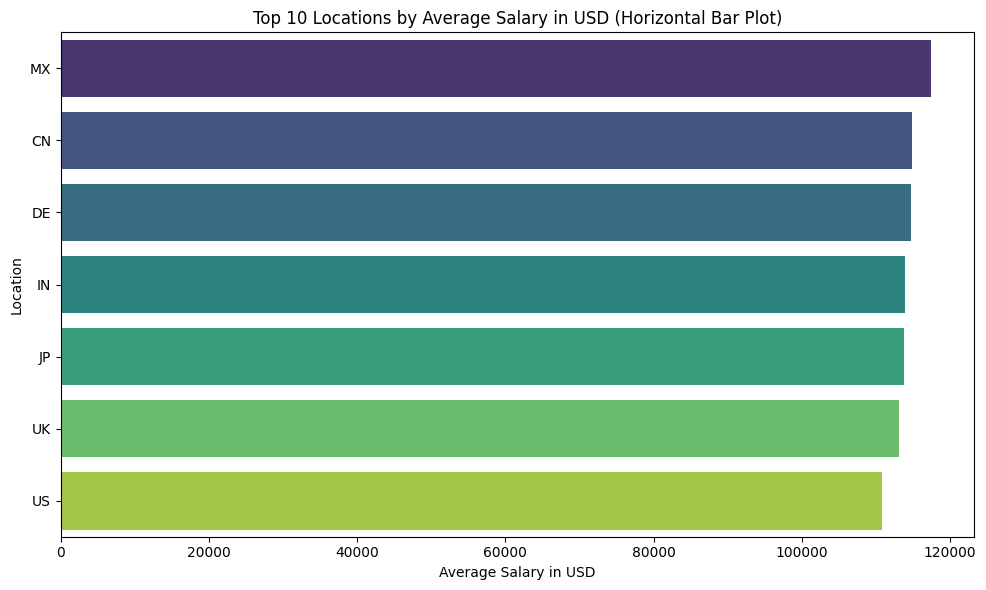

In [19]:
avg_salary_by_location = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=avg_salary_by_location.index, x=avg_salary_by_location.values, palette='viridis')
plt.title('Top 10 Locations by Average Salary in USD (Horizontal Bar Plot)')
plt.xlabel('Average Salary in USD')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


### Most Common Job Titles 

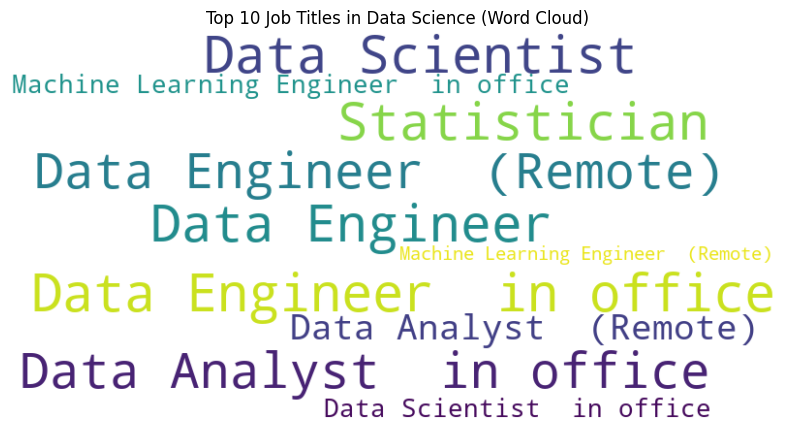

In [20]:
from wordcloud import WordCloud

top_job_titles = df['job_title'].value_counts().head(10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_job_titles.to_dict())

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 Job Titles in Data Science (Word Cloud)')
plt.axis('off')
plt.show()


#### Job Category Breakdown 

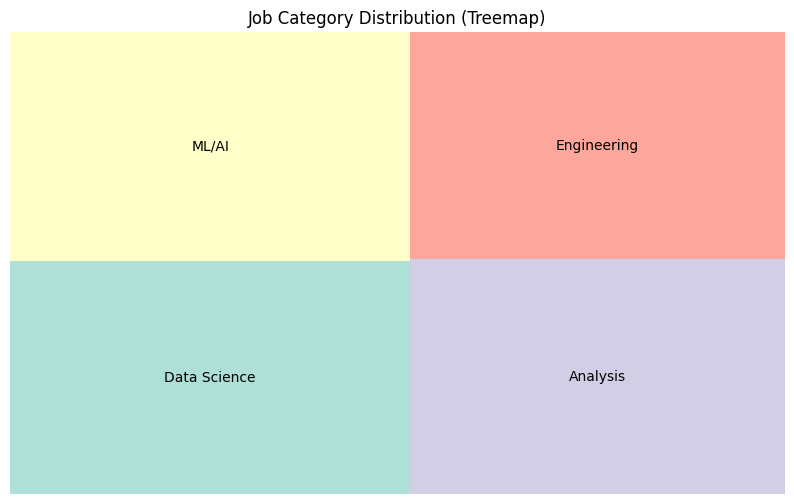

In [21]:
import squarify

job_category_counts = df['job_category'].value_counts()

plt.figure(figsize=(10, 6))
squarify.plot(sizes=job_category_counts.values, label=job_category_counts.index, color=sns.color_palette('Set3', len(job_category_counts)), alpha=0.7)
plt.title('Job Category Distribution (Treemap)')
plt.axis('off')  # Turn off the axis
plt.show()


####  Experience Level Distribution

<Figure size 1200x800 with 0 Axes>

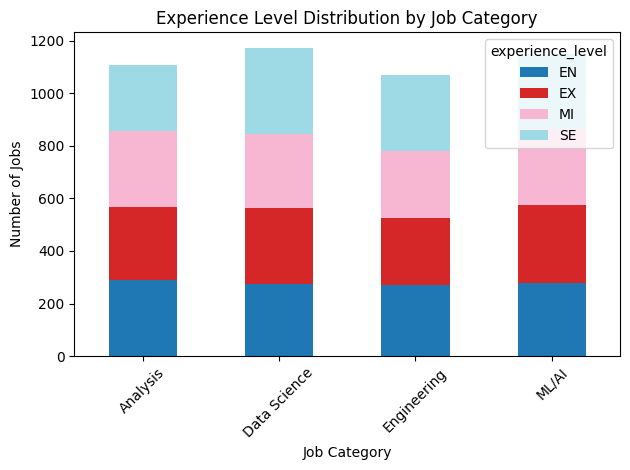

In [22]:
experience_category_data = df.groupby(['job_category', 'experience_level']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
experience_category_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Experience Level Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Employment Type Breakdown

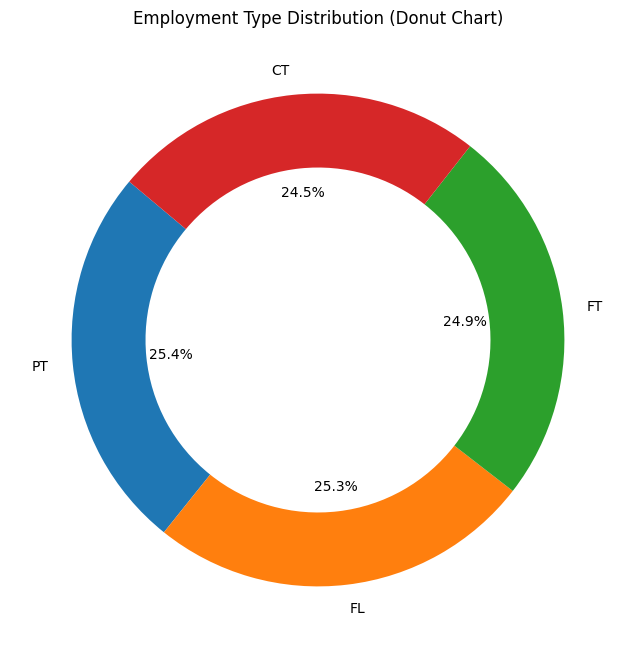

In [23]:
employment_type_counts = df['employment_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts.values, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Employment Type Distribution (Donut Chart)')
plt.show()


#### Company Size Distribution

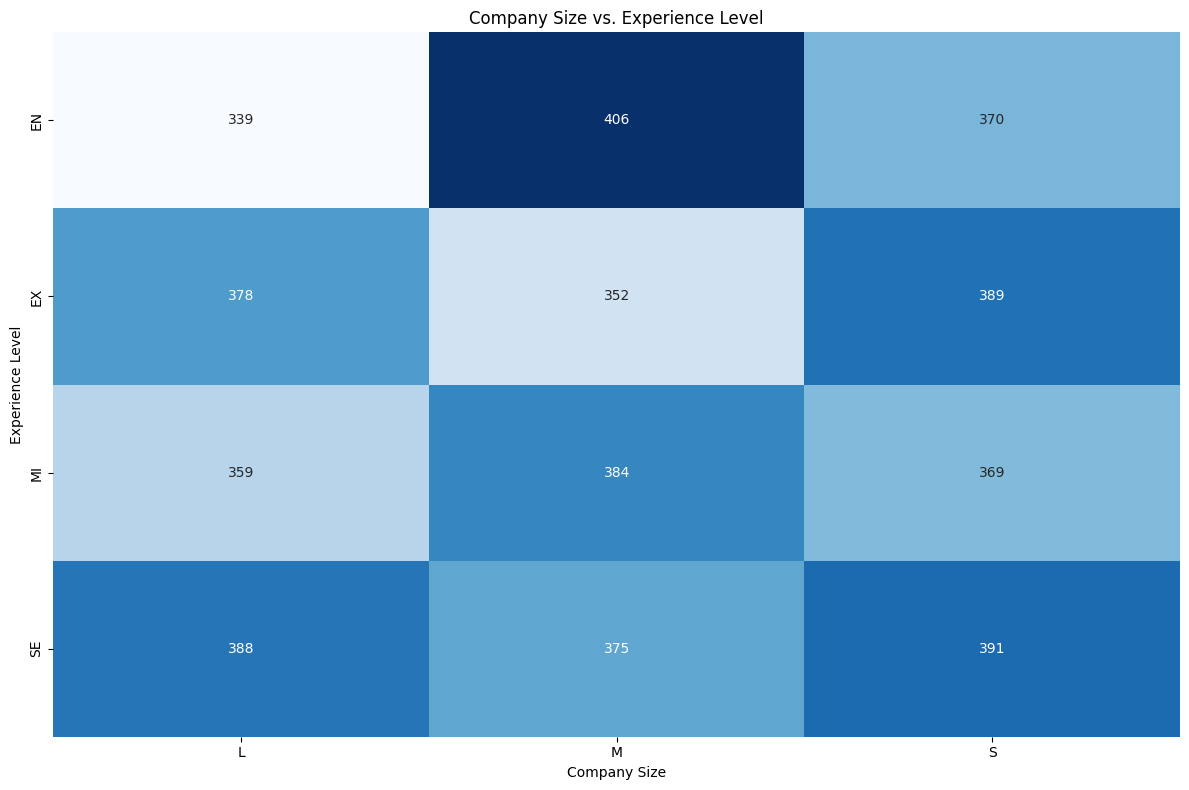

In [24]:
company_size_experience_data = df.groupby(['experience_level', 'company_size']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(company_size_experience_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Company Size vs. Experience Level')
plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.tight_layout()
plt.show()


### Work Setting Preferences

<Figure size 1200x800 with 0 Axes>

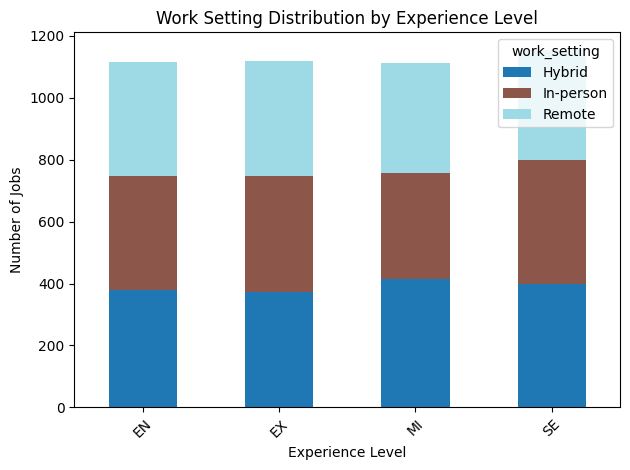

In [25]:
work_setting_experience_data = df.groupby(['experience_level', 'work_setting']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
work_setting_experience_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Work Setting Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Salary by Job Category

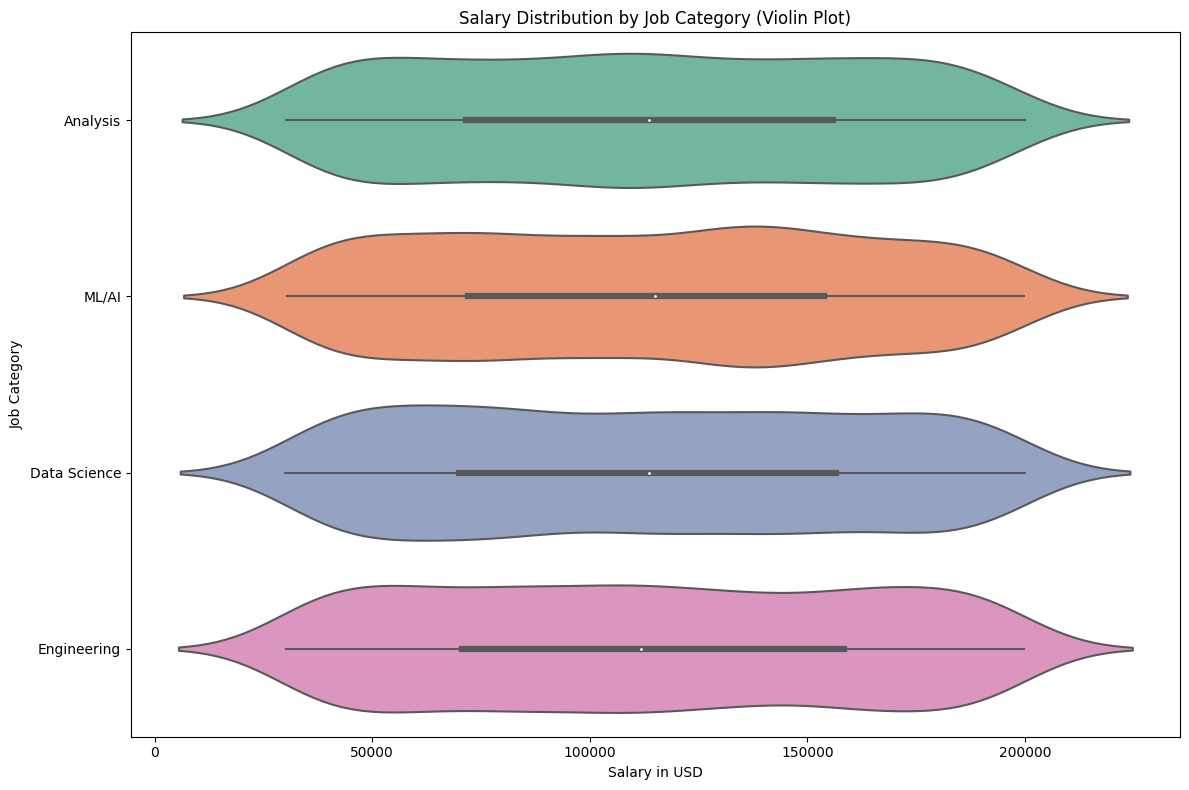

In [26]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='salary_in_usd', y='job_category', data=df, palette='Set2')
plt.title('Salary Distribution by Job Category (Violin Plot)')
plt.xlabel('Salary in USD')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()


#### Salary by Employment Type

<Figure size 1200x800 with 0 Axes>

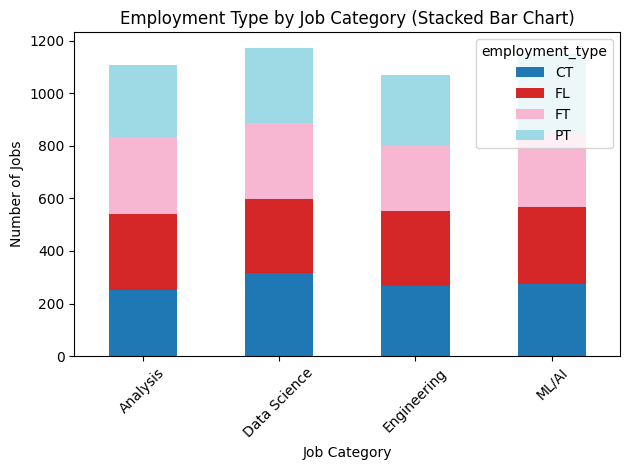

In [27]:
employment_job_data = df.groupby(['job_category', 'employment_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
employment_job_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Employment Type by Job Category (Stacked Bar Chart)')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Data Preprocessing

In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [29]:
# Selecting features and target variable
features = ['work_year', 'job_title', 'job_category', 'employee_residence',
            'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
target = 'salary_in_usd'

# Splitting the data into training and testing sets
X = df[features]
y = df[target]


In [30]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [31]:
# Defining preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [32]:
# Defining preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection and Training

In [35]:
# Importing models and evaluation metrics
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Defining a function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Creating a pipeline that includes preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Training the model
    pipeline.fit(X_train, y_train)
    # Making predictions
    y_pred = pipeline.predict(X_test)
    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


In [37]:
# Initializing models
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

In [38]:
# Training and evaluating each model
results = {}
for model_name, model in models.items():
    mae, rmse, r2 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}


In [39]:
# Displaying the results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)


Model Performance:


,MAE,RMSE,R2 Score
Gradient Boosting Regressor,42127.661879,49133.985636,-0.031183
Random Forest Regressor,42728.218216,49924.842260,-0.064646
XGBoost Regressor,45787.670027,55296.214688,-0.306059


#### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# Defining the parameter grid for Gradient Boosting Regressor
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 9],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [42]:
# Creating the pipeline for preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor(random_state=42))])

In [43]:
# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=50, cv=5, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1
)

In [44]:
# Fitting the model to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['work_year'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ig...
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object'))])),
                                             ('model',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                300]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [45]:
# Displaying the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_
print("Best Parameters:", best_params)
print("Best MAE Score from Cross-Validation:", best_score)

Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best MAE Score from Cross-Validation: 42746.36426436503


#### Model on Test Data

In [46]:
# Making predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

In [47]:
# Calculating performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Performance of the Tuned Gradient Boosting Regressor:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Performance of the Tuned Gradient Boosting Regressor:
MAE: 41692.83408551535
RMSE: 48518.3025906492
R2 Score: -0.005502360712994703


####  Importance Analysis

In [48]:
# Extracting feature importances from the best-performing model
best_model = GradientBoostingRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['work_year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job_title', 'job_category', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [49]:
# Extracting feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Getting feature names after one-hot encoding
encoded_features = list(pipeline.named_steps['preprocessor'].transformers_[1][1]
                        .named_steps['onehot'].get_feature_names_out(categorical_cols))

In [50]:
# Combining numerical and encoded categorical feature names
all_features = list(numerical_cols) + encoded_features

In [51]:
# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [52]:
# Displaying the top 10 features
print("\nTop 5 Features by Importance:")
display(feature_importance_df.head(5))



Top 5 Features by Importance:


,Feature,Importance
45,company_size_L,0.055865
0,work_year,0.048061
44,company_location_US,0.047476
40,company_location_IN,0.044261
15,job_title_Statistician in office,0.041200


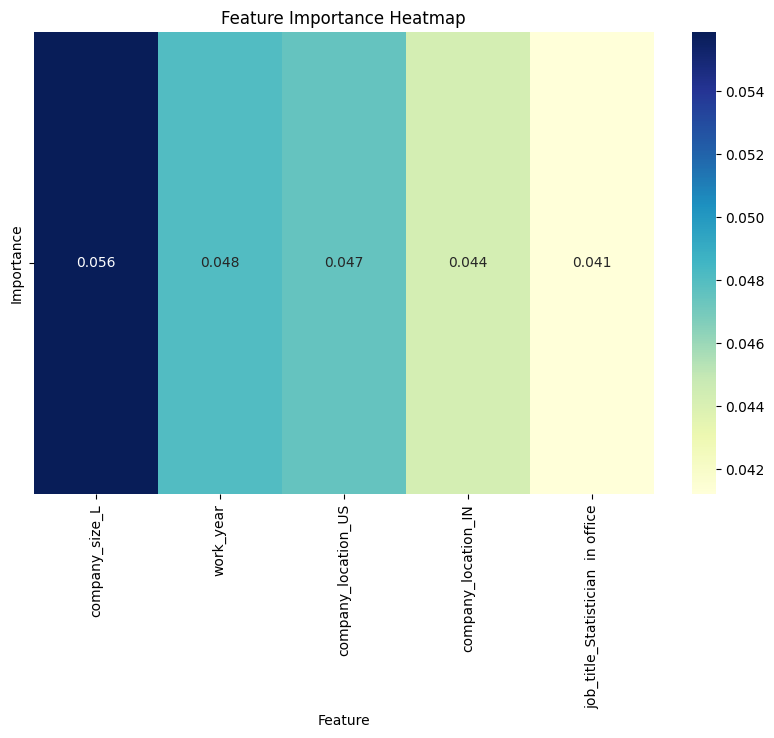

In [53]:
# Assuming `feature_importance_df` has a correlation matrix or feature interactions data
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df.head(5).set_index('Feature').T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Feature Importance Heatmap')
plt.show()